In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob
from read_xml import*
import tensorflow as tf

C:\Users\Robotmedia9\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from xml.etree.ElementTree import parse,dump,Element
tree = parse("./data/ss_search_image.xml")
ss_region = tree.getroot()
aaa=parse("./data/ground_truth_after_scale.xml")
gt_box=aaa.getroot()

In [ ]:
# dump(gt_box)
# dump(ss_region)

In [9]:
########## make the one xml file gt box 

# gt_box = Element("gt_box_image")
# for i in range(len(xml_data)):
#     image_num=Element("image_"+str(i))
#     gt_box.append(image_num)
    
#     xmin = xml_data[i].findtext("object/bndbox/xmin")
#     ymin = xml_data[i].findtext("object/bndbox/ymin")
#     xmax = xml_data[i].findtext("object/bndbox/xmax")
#     ymax = xml_data[i].findtext("object/bndbox/ymax")
#     xmin=int(float(xmin))
#     xmax=int(float(xmax))
#     ymin=int(float(ymin))
#     ymax=int(float(ymax))
#     box1=[xmin,ymin,xmax,ymax]# ground truth
#     width = xml_data[i].findtext("size/width")
#     height = xml_data[i].findtext("size/height")
#     width=int(float(width))
#     height=int(float(height))
#     w_scale=np.round(14/width,4)
#     h_scale=np.round(14/height,4)
    
#     box2=[0,0,0,0]
#     box2[0]=int(box1[0]*w_scale)
#     box2[1]=int(box1[1]*h_scale)
#     box2[2]=int(box1[2]*w_scale)
#     box2[3]=int(box1[3]*h_scale)
#     image_gt=Element("truth_box")
#     image_gt.text=str(box2)
#     image_num.append(image_gt)
# indent(gt_box)    
# # dump(gt_box)
# from xml.etree.ElementTree import ElementTree
# ElementTree(gt_box).write("ground_truth_after_scale.xml")

In [ ]:
image_ss_region=[]
image_gt_box=[]
#seletive search region string to array transform
for j in range(0,17125):
    
    positive_data=[]
    for i in range(1000):
        tmp=ss_region.findtext("t_image%d/t_positive/t_%d"%(j,i))
        if tmp !=None:
            positive_data.append(tmp)
        else:
            break
    pos=[]
    neg=[]
    for i in positive_data:
        a=i
        a = a.replace("[", "")
        a = a.replace("]", "")
        a = a.replace(" ", "")
        b=[]
        words = a.split(",")
        for i in words:
            b.append(int(i))
        pos.append(b)
    image_ss_region.append(pos)

    

In [31]:
#ground truth region string to array transform
for j in range(0,17125):
    tmp=gt_box.findtext("image_%d/truth_box"%j)
    tmp = tmp.replace("[", "")
    tmp = tmp.replace("]", "")
    tmp = tmp.replace(" ", "")
    b=[]
    words=tmp.split(",")
    for i in words:
        b.append(int(i))
    image_gt_box.append(b)

In [115]:
#iamge ss_region and image ground truth box 
print("Selective search regions : ",image_ss_region[0])
print("Ground truth box : ",image_gt_box[0])


Selective search regions :  [[4, 0, 9, 10], [0, 8, 3, 4], [4, 0, 8, 7], [4, 0, 8, 8], [4, 0, 9, 8], [4, 0, 9, 8], [2, 0, 9, 9]]
Ground truth box :  [5, 2, 10, 9]


In [85]:
total_part=glob.glob("D:/sppnet_feature2/*")
print("total file directory : ",len(total_part))

total file directory :  34


In [108]:
# img_part=1
cnt=0
image_data=[]
# for img_part in range(1,len(total_part)+1):#file directory
for img_part in range(1,2):#file directory
    img_cnt=glob.glob("D:/sppnet_feature2/%d/*.jpg"%img_part)
    img_num=int(len(img_cnt)/256)
    print(img_part,len(img_cnt),img_num,cnt)
    for i in range(cnt,cnt+img_num):# image number
#         print(i)
        for j in range(256):#feature number
            st="D:/sppnet_feature2/%d/image%d_feature%d.jpg"%(img_part,i,j)
#             print(st)
            n=cv2.imread(st,cv2.IMREAD_COLOR)
            n=cv2.cvtColor(n, cv2.COLOR_BGR2RGB)# matplotlib = RGB channel , opencv = BGR channels
            image_data.append(n)
    cnt=cnt+img_num
print(len(image_data))

1 128000 500 0
128000


In [109]:
print(len(image_data))


128000


0
image :  0
Selective search regions :  [[4, 0, 9, 10], [0, 8, 3, 4], [4, 0, 8, 7], [4, 0, 8, 8], [4, 0, 9, 8], [4, 0, 9, 8], [2, 0, 9, 9]]
Ground truth box :  [5, 2, 10, 9]


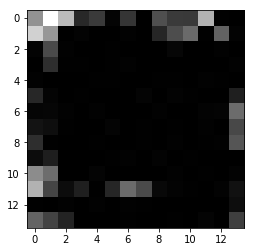

In [117]:
pic=0
ft=0

i=255*(pic)+ft
print(i)
plt.imshow(image_data[i])
#iamge ss_region and image ground truth box 
print("image : ",pic)
print("Selective search regions : ",image_ss_region[pic])
print("Ground truth box : ",image_gt_box[pic])

In [137]:
print(image_ss_region[pic])

[[4, 0, 9, 10], [0, 8, 3, 4], [4, 0, 8, 7], [4, 0, 8, 8], [4, 0, 9, 8], [4, 0, 9, 8], [2, 0, 9, 9]]


In [167]:
#bounding box regression
def bounding_box_regression(ss_data,gt_data):
#     print(ss_data)
#     print(gt_data)
    src_w = abs(ss_data[2] - ss_data[0])
    src_h = abs(ss_data[3] - ss_data[1])
    src_ctr_x = ss_data[0] + 0.5*src_w;
    src_ctr_y = ss_data[1] + 0.5*src_h;


    gt_w = gt_data[2] - gt_data[0]
    gt_h = gt_data[3] - gt_data[1]
    gt_ctr_x = gt_data[0] + 0.5*gt_w
    gt_ctr_y = gt_data[1] + 0.5*gt_h

    dst_ctr_x = (gt_ctr_x - src_ctr_x) * 1/src_w
    dst_ctr_y = (gt_ctr_y - src_ctr_y) * 1/src_h
    dst_scl_w = np.log(gt_w / src_w)
    dst_scl_h = np.log(gt_h / src_h)
    target = [dst_ctr_x, dst_ctr_y, dst_scl_w, dst_scl_h]
#     print("image_ss_region center x : ",src_ctr_x,"center y : ",src_ctr_y,"width : ",src_w,"height : ",src_h)
#     print("image_gt_box center x : ",gt_ctr_x,"center y : ",gt_ctr_y,"width : ",gt_w,"height : ",gt_h)

    pred_ctr_x = (target[0] * src_w) + src_ctr_x;
    pred_ctr_y = (target[1] * src_h) + src_ctr_y;
    pred_w = np.exp(target[2]) * src_w;
    pred_h = np.exp(target[3]) * src_h;
    pred_box = [pred_ctr_x - 0.5*pred_w, pred_ctr_y - 0.5*pred_h, pred_ctr_x + 0.5*pred_w, pred_ctr_y + 0.5*pred_h]
#     print("pred_box center x : ",pred_ctr_x,"center y : ",pred_ctr_y,"width : ",pred_w,"height : ",pred_h)
    return pred_box

In [168]:
pic=0
for i in range(len(image_ss_region[pic])):
    pred=bounding_box_regression(image_ss_region[pic][i],image_gt_box[pic])
    print("pred : ",pred)

pred :  [5.0, 2.0, 10.0, 9.0]
pred :  [5.0, 2.0, 10.0, 9.0]
pred :  [5.0, 2.0, 10.0, 9.0]
pred :  [5.0, 2.0, 10.0, 9.0]
pred :  [5.0, 2.0, 10.0, 9.0]
pred :  [5.0, 2.0, 10.0, 9.0]
pred :  [5.0, 2.0, 10.0, 9.0]


(14, 14, 3)


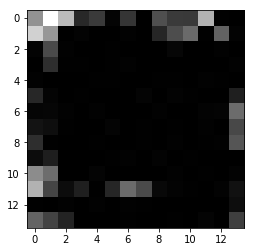

In [172]:
print(np.shape(image_data[0]))
plt.imshow(image_data[0])

[4, 0, 9, 10]


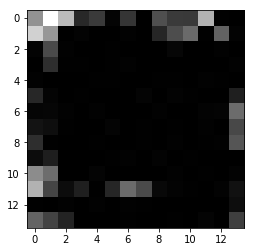

In [183]:
pic=0
i=0
image=image_data[pic]
ss=image_ss_region[pic][i]
print(ss)
plt.imshow(image)
w = abs(ss[2] - ss[0])
h = abs(ss[3] - ss[1])
subim_input = image[ss[0] : ss[0]+w,ss[1] : ss[1]+h]

(5, 10, 3)


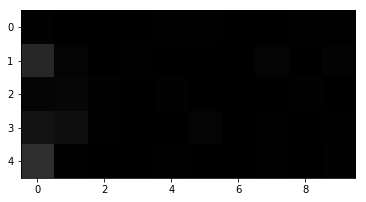

In [184]:
print(np.shape(subim_input))
plt.imshow(subim_input)

In [190]:
X = tf.placeholder(tf.float32, [None, None,None,3]) # image data 
a=int(14)
#SPP 6*6
spp6_ksize=round(a/6+0.49)
spp6_stride=int(a/6)
Spp6 = tf.nn.max_pool(X,ksize=[1,spp6_ksize,spp6_ksize,1],strides=[1,spp6_stride,spp6_stride,1],padding="SAME")
Spp6_flatten = tf.reshape(Spp6,[-1,256*7*7])

#SPP 3*3
spp3_ksize=round(a/3+0.49)
spp3_stride=int(a/3)
Spp3 = tf.nn.max_pool(X,ksize=[1,spp3_ksize,spp3_ksize,1],strides=[1,spp3_stride,spp3_stride,1],padding="SAME")
Spp3_flatten = tf.reshape(Spp3,[-1,256*4*4])

#SPP 2*2
spp2_ksize=round(a/2+0.49)
spp2_stride=int(a/2)
Spp2 = tf.nn.max_pool(X,ksize=[1,spp2_ksize,spp2_ksize,1],strides=[1,spp2_stride,spp2_stride,1],padding="SAME")
Spp2_flatten = tf.reshape(Spp2,[-1,256*2*2])

#SPP 1*1
spp1_ksize=round(a/1+0.49)
spp1_stride=int(a/1)
Spp1 = tf.nn.max_pool(X,ksize=[1,spp1_ksize,spp1_ksize,1],strides=[1,spp1_stride,spp1_stride,1],padding="SAME")
Spp1_flatten = tf.reshape(Spp1,[-1,256*1*1])

spp_concat=tf.concat([Spp1_flatten,Spp2_flatten,Spp3_flatten,Spp6_flatten],1)





#size : 2*2*256
#Fully connected network
keep_prob=tf.placeholder(tf.float32)  
Fc6_b=tf.Variable(tf.random_normal([4096]))
Fc7_b=tf.Variable(tf.random_normal([20]))
Fc6_w= tf.get_variable("Fc6_w", shape=[17920, 4096],
     initializer=tf.contrib.layers.xavier_initializer())
Fc7_w= tf.get_variable("Fc7_w", shape=[4096, 20],
     initializer=tf.contrib.layers.xavier_initializer())
FL1 = tf.nn.relu(tf.matmul(spp_concat, Fc6_w) + Fc6_b)
FL1=tf.nn.dropout(FL1,keep_prob=keep_prob)

logits = tf.matmul(FL1, Fc7_w) + Fc7_b


In [191]:
print(spp6_ksize,spp3_ksize,spp2_ksize,spp1_ksize)

3 5 7 14


In [196]:
sess=tf.Session()
feed_dict={X:subim_input}
print(sess.run(Spp6_flatten))


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_9' with dtype float and shape [?,?,?,3]
	 [[Node: Placeholder_9 = Placeholder[dtype=DT_FLOAT, shape=[?,?,?,3], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'Placeholder_9', defined at:
  File "C:\Users\Robotmedia9\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Robotmedia9\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.io_loop.start()
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-190-f18d678b020f>", line 1, in <module>
    X = tf.placeholder(tf.float32, [None, None,None,3]) # image data
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1680, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 4105, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3160, in create_op
    op_def=op_def)
  File "C:\Users\Robotmedia9\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_9' with dtype float and shape [?,?,?,3]
	 [[Node: Placeholder_9 = Placeholder[dtype=DT_FLOAT, shape=[?,?,?,3], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
